<a href="https://colab.research.google.com/github/deboralimasantos/Python-Labs/blob/main/Atividade1_Stars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **1. Como os dados devem ser preparados para o processamento?**

A priori, deve fazer um overview dos seus dados. Como olhar histogramas e valores nulos a fim de entender qual a informação que a tabela traz. Segue analise a seguir:

In [2]:
data = pd.read_csv("Stars.csv")
data #visualizando as variaveis de forma geral

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,5
236,30839,834042.000000,1194.0000,-10.63,Blue,O,5
237,8829,537493.000000,1423.0000,-10.73,White,A,5
238,9235,404940.000000,1112.0000,-11.23,White,A,5


from matplotlib import pyplot as plt
data['Temperature'].plot(kind='hist', bins=20, title='Temperature')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['L'].plot(kind='hist', bins=20, title='L')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['R'].plot(kind='hist', bins=20, title='R')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['A_M'].plot(kind='hist', bins=20, title='A_M')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Spectral_Class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Temperature', y='L', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='L', y='R', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='R', y='A_M', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='A_M', y='Type', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['Temperature'].plot(kind='line', figsize=(8, 4), title='Temperature')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['L'].plot(kind='line', figsize=(8, 4), title='L')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['R'].plot(kind='line', figsize=(8, 4), title='R')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['A_M'].plot(kind='line', figsize=(8, 4), title='A_M')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['Spectral_Class'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='Temperature', y='Spectral_Class', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['Spectral_Class'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='L', y='Spectral_Class', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['Spectral_Class'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='R', y='Spectral_Class', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['Spectral_Class'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='A_M', y='Spectral_Class', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [3]:
print(data.isna().sum())

Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
Type              0
dtype: int64


Nota-se que as features temperatura, L e R possuem valores positivos e concentrados proximo do zero, enquanto a variavel a_m possui valores positivos e negativos, com distribuicao muito proxima de uma bimodal.

Alem dessas variaveis continuas, há tambem variaveis categoricas como: Type, Spectral class e color bastante desbalanceadas


Dito isso, precisamos manipular essas colunas como:
- Transformar a coluna color da seguinte forma: deixar os caracteres em caixa baixa e retirar hifen e criar labels para as strings.
- Coluna spectral class também sera criada labels.
- Escalonar as colunas de variavel continua: temperature, A_M, L e R


Por fim, ja entendemos o necessario para processar

### **2. Quais as variáveis devem ser reescalonadas e por qual método?**


Para as features temperature, L,R e A_M foi escalonado utilizando o MinMaxScaler. E por ultimo, Color e spectral class foi utilizado one hot encoder. Segue tratamentos:

In [4]:
data_trata = data.Color.str.lower().str.replace('-',' ') #mudando a forma da variavel para caixa pequena e removendo os traços
data_trata.unique()

array(['red', 'blue white', 'white', 'yellowish white',
       'pale yellow orange', 'blue', 'whitish', 'yellow white', 'orange',
       'white yellow', 'yellowish', 'orange red'], dtype=object)

In [5]:
data["color"] = data_trata
data_trata_final = data.drop(columns="Color")
data_trata_final.dtypes #checando a estrutura da tabela

Temperature         int64
L                 float64
R                 float64
A_M               float64
Spectral_Class     object
Type                int64
color              object
dtype: object

In [6]:
scaler = MinMaxScaler()
data_norm = scaler.fit_transform(data_trata_final[["Temperature","L","R","A_M"]])

In [ ]:
data_norm = pd.DataFrame(data_norm,columns=["temperature","l","r","a_m"])
data_norm

In [9]:
label = OneHotEncoder()

In [10]:
data_cate = label.fit_transform(data_trata_final['color'].values.reshape(-1,1)).toarray()
data_cate2 = label.fit_transform(data_trata_final['Spectral_Class'].values.reshape(-1,1)).toarray()

In [11]:
tratamento_cat = pd.DataFrame(data_cate,columns=['color1','color2','color3','color4','color5','color6','color7','color8','color9','color10','color11','color12'])
tratamento_cat2 = pd.DataFrame(data_cate2,columns=['spectral_class1','spectral_class2','spectral_class3','spectral_class4','spectral_class5','spectral_class6','spectral_class7'])

In [47]:
data_final = data_trata_final.join(data_norm).join(tratamento_cat).join(tratamento_cat2)

In [14]:
df = data_final.drop(columns=['Temperature','L','R','A_M','Spectral_Class','color'])

### **3. Aplique a redução de variáveis pelo método PCA e determine o número de componentes necessárias para se explicar, pelo menos, 90% da variância dos dados**

In [16]:
import seaborn as sns

Axes(0.125,0.11;0.62x0.77)


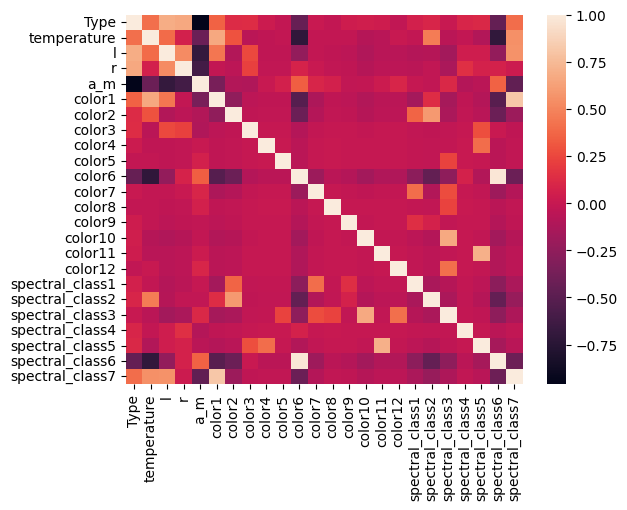

In [58]:
features = df
corr = features.corr().round(2)
print(sns.heatmap(corr))

In [18]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(features)
expl = pca.explained_variance_ratio_
svalues = pca.singular_values_
x = pca.transform(features)

In [22]:
explainability = pca.explained_variance_ratio_.cumsum() #acumulado da tava da variancia
factors = np.arange(1,features.shape[1]+1,1)

Text(0, 0.5, 'Explicabilidade dos dados')

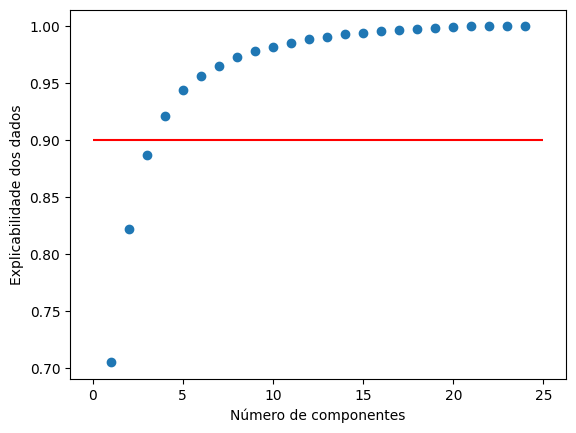

In [23]:
plt.scatter(factors,explainability)
plt.hlines(0.9,0,25,'r')
plt.xlabel('Número de componentes')
plt.ylabel('Explicabilidade dos dados')

In [24]:
p = factors[explainability<0.9].max()+1

print('90% dos dados são explicados com ' + str(p) + ' componentes.')

pca = PCA(n_components=p)
pca.fit(df)
x = pca.transform(df) #nova base de dados com a tranformação da base original

90% dos dados são explicados com as 4 componentes.


### **4. Olhando as três primeiras componentes principais do PCA, quais a variáveis da tabela são mais importantes para o agrupamento dos dados?**

In [25]:
comp = (pca.components_*100).round(1) #as 4 componentes do pca e suas variancias

In [26]:
features_out = pd.DataFrame(comp,columns=['Type', 'temperature', 'l', 'r', 'a_m', 'color1', 'color2', 'color3',
       'color4', 'color5', 'color6', 'color7', 'color8', 'color9', 'color10',
       'color11', 'color12', 'spectral_class1', 'spectral_class2',
       'spectral_class3', 'spectral_class4', 'spectral_class5',
       'spectral_class6', 'spectral_class7'],index=['1','2','3','4'])

In [27]:
pd.set_option('display.max_columns', None)
features_out

,Type,temperature,l,r,a_m,color1,color2,color3,color4,color5,color6,color7,color8,color9,color10,color11,color12,spectral_class1,spectral_class2,spectral_class3,spectral_class4,spectral_class5,spectral_class6,spectral_class7
1,94.3,6.7,8.0,9.1,-17.3,9.6,3.1,0.7,0.1,-0.1,-14.2,0.2,-0.1,0.1,0.6,0.2,-0.2,1.0,2.9,0.0,0.3,0.9,-14.5,9.3
2,21.1,-21.7,3.2,17.4,-6.8,-25.5,-23.6,1.1,-0.2,-0.4,56.5,-3.2,-0.4,-0.7,-1.9,-0.5,-1.3,-7.3,-30.6,-5.7,0.7,0.4,55.8,-13.3
3,8.8,-8.9,-11.8,7.3,2.8,-55.7,49.3,0.8,0.2,0.1,-1.7,3.0,0.1,1.0,1.9,0.7,0.3,15.1,33.9,3.0,0.4,1.7,-2.2,-51.9
4,2.0,-17.7,-6.7,-8.2,6.9,-26.9,-18.0,1.2,1.2,2.2,-22.0,25.8,2.2,1.4,22.0,4.0,6.9,32.2,-56.4,44.5,0.2,6.6,-22.4,-4.7


PC1 = type

PC2 = color red e spectral_class M

PC3 = color blue white e spectral_class B

### **5. Utilize o método de agrupamento hierárquico para agrupar as estrelas de acordo com suas características. Qual o número de agrupamentos ideal para análise desses dados?**

In [28]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score,confusion_matrix
import matplotlib.cm as cm

In [29]:
#criar um loop para gerar agrupamento hierarquico de [2,50] clusters
#avaliar silhueta de cada sample
for n_clusters in range(2,50):
  aggclust = AgglomerativeClustering(n_clusters=n_clusters).fit(x)
  categorias = aggclust.labels_

  sample_silhouette_values = silhouette_samples(x, categorias) # score da silhueta pra cada amostra do cluster
  silhouette_avg = silhouette_score(x, categorias) #score medio

  values_bad = ( sample_silhouette_values < 0 ) #valores negativos sao considerados ruins para o modelo, ja que indica distancia intracluster > intercluster na media
  p = (100 * values_bad.sum() / len(values_bad)).round(2)
  print(f'pontos mal classificados: {p} %, n_cluters = {n_clusters}, silhueta media = {silhouette_avg.round(2)}')

pontos mal classificados: 0.42 %, n_cluters = 2, silhueta media = 0.54
pontos mal classificados: 2.08 %, n_cluters = 3, silhueta media = 0.57
pontos mal classificados: 0.0 %, n_cluters = 4, silhueta media = 0.63
pontos mal classificados: 0.0 %, n_cluters = 5, silhueta media = 0.63
pontos mal classificados: 0.42 %, n_cluters = 6, silhueta media = 0.65
pontos mal classificados: 0.42 %, n_cluters = 7, silhueta media = 0.71
pontos mal classificados: 0.42 %, n_cluters = 8, silhueta media = 0.74
pontos mal classificados: 0.42 %, n_cluters = 9, silhueta media = 0.76
pontos mal classificados: 0.83 %, n_cluters = 10, silhueta media = 0.76
pontos mal classificados: 0.83 %, n_cluters = 11, silhueta media = 0.79
pontos mal classificados: 0.83 %, n_cluters = 12, silhueta media = 0.83
pontos mal classificados: 1.25 %, n_cluters = 13, silhueta media = 0.84
pontos mal classificados: 1.25 %, n_cluters = 14, silhueta media = 0.86
pontos mal classificados: 0.42 %, n_cluters = 15, silhueta media = 0.88
po

Dado o valor da silhueta medio e a quantidade de pontos mal classificados, o modelo com numero de clusters iguais a 20, 21 ou 22 são os ideias, ja que possuem silhueta media muito proximo de 1 e 0% de pontos mal classificados

In [30]:
aggclust = AgglomerativeClustering(n_clusters=20).fit(x)

### **7. Utilize o método KMeans para agrupar as estrelas de acordo com suas características. Qual o número de agrupamentos ideal para análise desses dados?**

In [31]:
from sklearn.cluster import KMeans

pontos mal classificados: 0.0 %, n_cluters = 2, silhueta media = 0.48
pontos mal classificados: 0.0 %, n_cluters = 3, silhueta media = 0.57
pontos mal classificados: 0.0 %, n_cluters = 4, silhueta media = 0.63
pontos mal classificados: 0.0 %, n_cluters = 5, silhueta media = 0.61
pontos mal classificados: 0.0 %, n_cluters = 6, silhueta media = 0.69
pontos mal classificados: 0.0 %, n_cluters = 7, silhueta media = 0.67
pontos mal classificados: 0.0 %, n_cluters = 8, silhueta media = 0.73
pontos mal classificados: 0.42 %, n_cluters = 9, silhueta media = 0.74
pontos mal classificados: 0.0 %, n_cluters = 10, silhueta media = 0.8
pontos mal classificados: 0.0 %, n_cluters = 11, silhueta media = 0.82
pontos mal classificados: 0.42 %, n_cluters = 12, silhueta media = 0.83
pontos mal classificados: 0.83 %, n_cluters = 13, silhueta media = 0.85
pontos mal classificados: 0.42 %, n_cluters = 14, silhueta media = 0.83
pontos mal classificados: 0.42 %, n_cluters = 15, silhueta media = 0.88
pontos mal

Text(0.5, 0, 'Numero de Clusters')

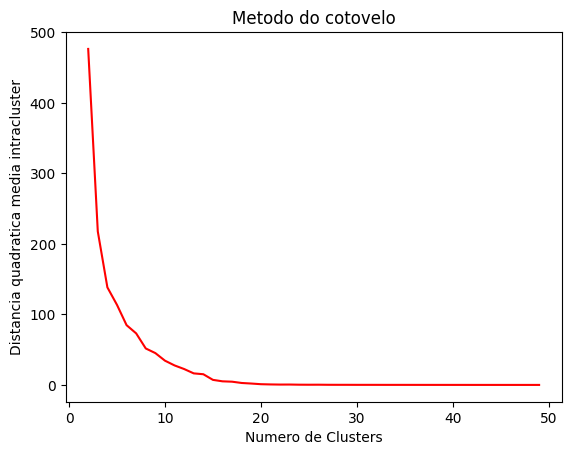

In [32]:
#criar um loop para gerar agrupamento kmeans de [2,50] clusters
#avaliar silhueta de cada sample e medidas ruins
#usar metrica do cotovelo para estimar o melhor numero de cluster
elbow = []
for n_clusters in range(2,50):
  kmeans = KMeans(n_clusters=n_clusters,n_init='auto').fit(x)
  categorias = kmeans.labels_

  sample_silhouette_values = silhouette_samples(x, categorias) # score da silhueta pra cada amostra do cluster
  silhouette_avg = silhouette_score(x, categorias) #score medio
  elbow.append(kmeans.inertia_) #A inertia_ é a soma das distâncias quadráticas entre os pontos de dados e os centros dos clusters

  values_bad = ( sample_silhouette_values < 0 ) #valores negativos sao considerados ruins para o modelo, ja que indica que a distancia intracluster > intercluster na media
  p = (100 * values_bad.sum() / len(values_bad)).round(2)
  print(f'pontos mal classificados: {p} %, n_cluters = {n_clusters}, silhueta media = {silhouette_avg.round(2)}')
plt.plot(range(2,50),elbow,color='red')
plt.title('Metodo do cotovelo')
plt.ylabel('Distancia quadratica media intracluster')
plt.xlabel('Numero de Clusters')

o numero adequado clusters é 14

In [33]:
kmeans = KMeans(n_clusters=14,n_init='auto').fit(x)

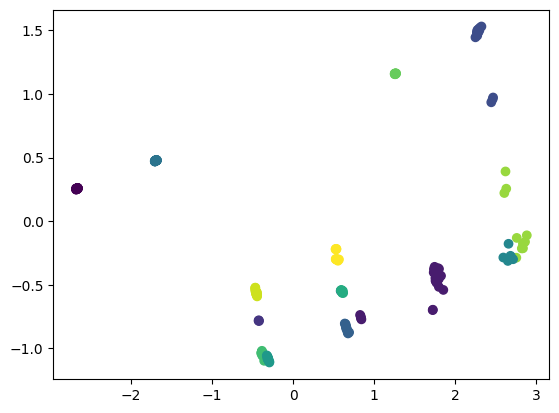

In [60]:
categories = kmeans.labels_
plt.scatter(x[:,0],x[:,1],c=categories)

### **7. Utilize o método DBSCAN para agrupar as estrelas de acordo com suas caraterísticas. Qual o número de agrupamentos obtido? Comente sobre a presença ou não de outliers.**

In [35]:
from sklearn.cluster import DBSCAN
#criar um loop para gerar agrupamento dbscan com numero de samples e epsilon interativas a fim de escolher o modelo com menor valores negativo da silhueta e com silhueta media prox de 1
#o modelo usa essas duas entrada, logo, para escolher o mais adequado, olharemos a silhueta

epsilon = np.arange(1, 10, 0.1)
minN = range(1,400)
param = []
for eps in epsilon:
  for min in minN:

    try:
      dbscan = DBSCAN(eps = eps, min_samples = min).fit(x)
      categorias = dbscan.labels_

      sample_silhouette_values = silhouette_samples(x, categorias) # score da silhueta pra cada amostra do cluster
      silhouette_avg = silhouette_score(x, categorias) #score medio

      values_bad = ( sample_silhouette_values < 0 ) #valores negativos sao considerados ruins para o modelo, ja que indica que a distancia intracluster > intercluster na media
      p = (100 * values_bad.sum() / len(values_bad)).round(2)
      #print(f'pontos mal classificados: {p} %, eps e sampl = {eps.round(2),min}, silhueta media = {silhouette_avg.round(2)}')
      param.append({'bad':p,'params':(eps.round(2),min),'silhueta':silhouette_avg.round(2)})

    except:
      pass


In [36]:
parametros = pd.DataFrame(param)

In [37]:
print(parametros.sort_values(by='silhueta',ascending = False).iloc[:30])

,bad,params,silhueta
0,0.42,"(1.0, 1)",0.67
4,0.42,"(1.0, 5)",0.67
5,0.42,"(1.0, 6)",0.67
1,0.42,"(1.0, 2)",0.67
3,0.42,"(1.0, 4)",0.67
2,0.42,"(1.0, 3)",0.67
6,1.67,"(1.0, 7)",0.66
102,0.42,"(1.1, 23)",0.65
110,0.42,"(1.1, 31)",0.65
109,0.42,"(1.1, 30)",0.65


parametros escolhidos sao: eps = 1,1 e samples = 23

In [38]:
dbscan = DBSCAN(eps = 1.1, min_samples = 23).fit(x)
categorias = dbscan.labels_
dbscan

DBSCAN(eps=1.1, min_samples=23)

Text(0, 0.5, 'PC2')

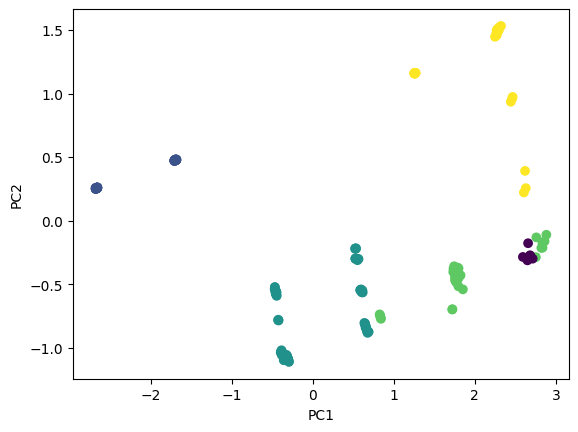

In [57]:
plt.scatter(x[:,0],x[:,1], c = categorias)
plt.xlabel('PC1')
plt.ylabel('PC2')

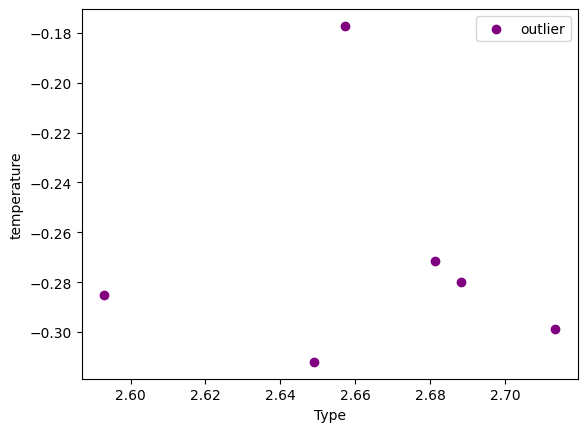

In [40]:
X = pd.DataFrame(x)
outliers = X[categorias == -1]
plt.scatter(outliers[0],outliers[1],c='purple',label='outlier')
plt.xlabel('Type')
plt.ylabel('temperature')
plt.legend()

Os pontos roxos nos ultimos 2 graficos são outliers que o dbscan detectou

### **8. Faça uma análise sobre a performance geral dos algoritmos utilizados nos itens de 5 a 7**

In [41]:
aggclust

AgglomerativeClustering(n_clusters=20)

In [42]:
kmeans

KMeans(n_clusters=14, n_init='auto')

In [43]:
dbscan

DBSCAN(eps=1.1, min_samples=23)

o agrupamento hierarquico e o kmeans foram os algoritmos que performaram melhor na fase de treinamente, ambos com silhueta media de 93% e valores mal classificado proximo de 0%. Porém, o agrupamento hierarquico ofereceu maior robustez mesmo com maior custo computacional, enquanto o kmeans retorna grupos e silhuetas sempre diferentes a medida que rodamos e, alem disso, o metodo do cotovelo não foi um metrica robusta para essa amostra.

O dbscan ofereceu uma boa metrica (67%), inferior aos outros dois modelos, porém foi possivel identificar outliers na amostra, concentradas na coluna type = 5.

Esses modelos foram apenas treinados e avaliado de forma in-sample. Para melhor avaliação, se ve necessario avaliar out-of-sample

